# Stock Clustering Analysis Pipeline

This notebook performs a complete clustering analysis pipeline on stock returns data using multiple clustering methods:
- **Leiden Clustering**: Community detection based on correlation matrix
- **Louvain Clustering**: Modularity-based community detection
- **Industry Clustering**: Clustering based on industry classification

The analysis visualizes how different industries are distributed across clusters identified by each method.

## Step 1: Load Stock Returns Data

Load the stock price data and preprocess it by interpolating missing values.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load stock prices
Returns = pd.read_csv('stock_prices.csv', index_col=0)
print("Original shape of Returns data:", Returns.shape)

# Interpolate missing data
Returns.interpolate(method='linear', axis=0, limit_direction='both', inplace=True)
print("Data loaded and preprocessed successfully!")
print(f"Number of stocks: {Returns.shape[1]}")
print(f"Number of time periods: {Returns.shape[0]}")

# Display first few rows
Returns.head()

Original shape of Returns data: (33978, 84)
Data loaded and preprocessed successfully!
Number of stocks: 84
Number of time periods: 33978


,ABT,AEP,ALL,APA,AVP,AXP,BA,BAC,BAX,BHI,...,UTX,V,VZ,WAG,WFC,WMB,WMT,WY,XOM,XRX
timestamp,,,,,,,,,,,,,,,,,,,,,
2008-09-02 13:30:00,58.423452,39.602787,45.697671,110.020999,43.477229,41.148213,67.934522,32.981498,68.378602,77.442073,...,66.631589,77.038873,35.840726,36.933270,31.451769,30.072193,60.076032,56.731888,78.190018,14.416678
2008-09-02 13:31:00,58.486896,39.602787,45.781989,110.020999,43.477229,41.148213,67.934522,32.989938,68.336705,77.442073,...,66.778460,77.225814,35.863855,36.944774,31.498081,30.072193,60.207687,56.637669,78.180793,14.416678
2008-09-02 13:32:00,58.495018,39.537460,45.753183,110.020999,43.600090,41.340087,67.902852,32.977620,68.545130,77.455280,...,66.891117,77.176011,35.854129,37.028759,31.509730,29.955143,60.496263,56.571532,77.965061,14.416678
2008-09-02 13:33:00,58.489390,39.508807,45.470182,110.020999,43.555185,41.210122,68.165291,32.929745,68.686580,77.330938,...,66.979880,77.163261,35.868338,37.010264,31.438751,29.659124,60.693427,56.591003,77.819938,14.472406
2008-09-02 13:34:00,58.503328,39.592403,45.322855,109.475934,43.567261,40.957044,67.952471,32.777688,68.718611,77.554391,...,67.082530,77.247565,35.913776,37.027540,31.437492,29.524651,60.818429,56.757591,77.923280,14.479567


## Step 2: Run All Clustering Methods

Apply Leiden, Louvain, and Industry-based clustering to the returns data.

In [2]:
from Utils import run_all_clustering_methods

# Run all clustering methods
print("Running clustering methods...")
clustering_results = run_all_clustering_methods(Returns)

print("\nClustering completed successfully!")
print(f"\nClustering Results Shape: {clustering_results.shape}")
print("\nFirst few results:")
print(clustering_results.head(10))

# Summary statistics
print("\n" + "="*60)
print("CLUSTERING SUMMARY")
print("="*60)

for method in ['Leiden_Cluster', 'Louvain_Cluster', 'Industry_Cluster']:
    n_clusters = clustering_results[method].nunique()
    print(f"\n{method}:")
    print(f"  Number of clusters: {n_clusters}")
    print(f"  Cluster sizes:")
    cluster_sizes = clustering_results[method].value_counts().sort_index()
    for cluster_id, size in cluster_sizes.items():
        print(f"    Cluster {cluster_id}: {size} stocks")

Running clustering methods...
Original shape of Returns data: (33978, 84)
Original shape of Returns data: (33978, 84)

Clustering completed successfully!

Clustering Results Shape: (84, 3)

First few results:
     Louvain_Cluster  Leiden_Cluster  Industry_Cluster
ABT                0               2                 5
AEP                1               0                13
ALL                2               1                 7
APA                2               1                 2
AVP                1               0                 7
AXP                1               0                 3
BA                 2               1                 6
BAC                0               2                 3
BAX                1               0                 5
BHI                0               2                 2

CLUSTERING SUMMARY

Leiden_Cluster:
  Number of clusters: 3
  Cluster sizes:
    Cluster 0: 31 stocks
    Cluster 1: 29 stocks
    Cluster 2: 24 stocks

Louvain_Cluster:
  Number of clu

## Step 3: Visualize Industry Distribution Across Clusters

Create stacked bar charts showing the proportion of each industry within each cluster for all three clustering methods.

Creating visualization...


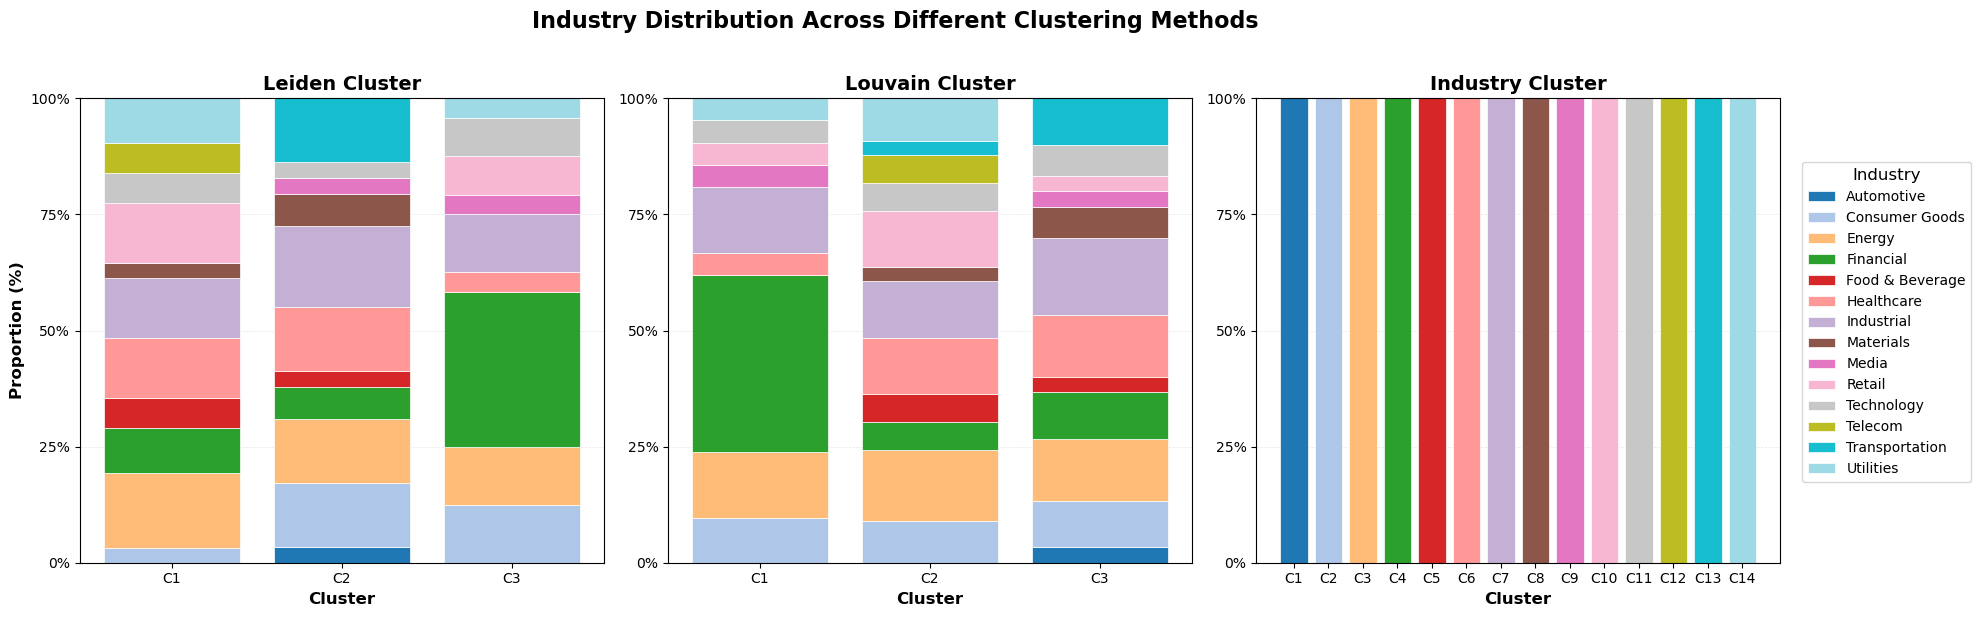


Visualization complete!


In [3]:
from plots import plot_all_clustering_methods, plot_industry_distribution_by_cluster

# Plot all three clustering methods side by side
print("Creating visualization...")
fig = plot_all_clustering_methods(clustering_results)
plt.show()

print("\nVisualization complete!")

## Step 4: Cluster Correlation Analysis

Visualize the correlation strength within and between clusters. The network graphs show:
- **Nodes**: Represent clusters (size proportional to number of stocks)
- **Edges**: Represent average correlation strength between clusters
- **Edge Labels**: Show the average correlation percentage
- **Node Labels**: Show cluster ID

Creating cluster correlation graphs...


/Users/timot/Desktop/Project Big DATA/plots.py:332: RuntimeWarning: Mean of empty slice
  avg_within = np.nanmean(np.abs(within_corr))


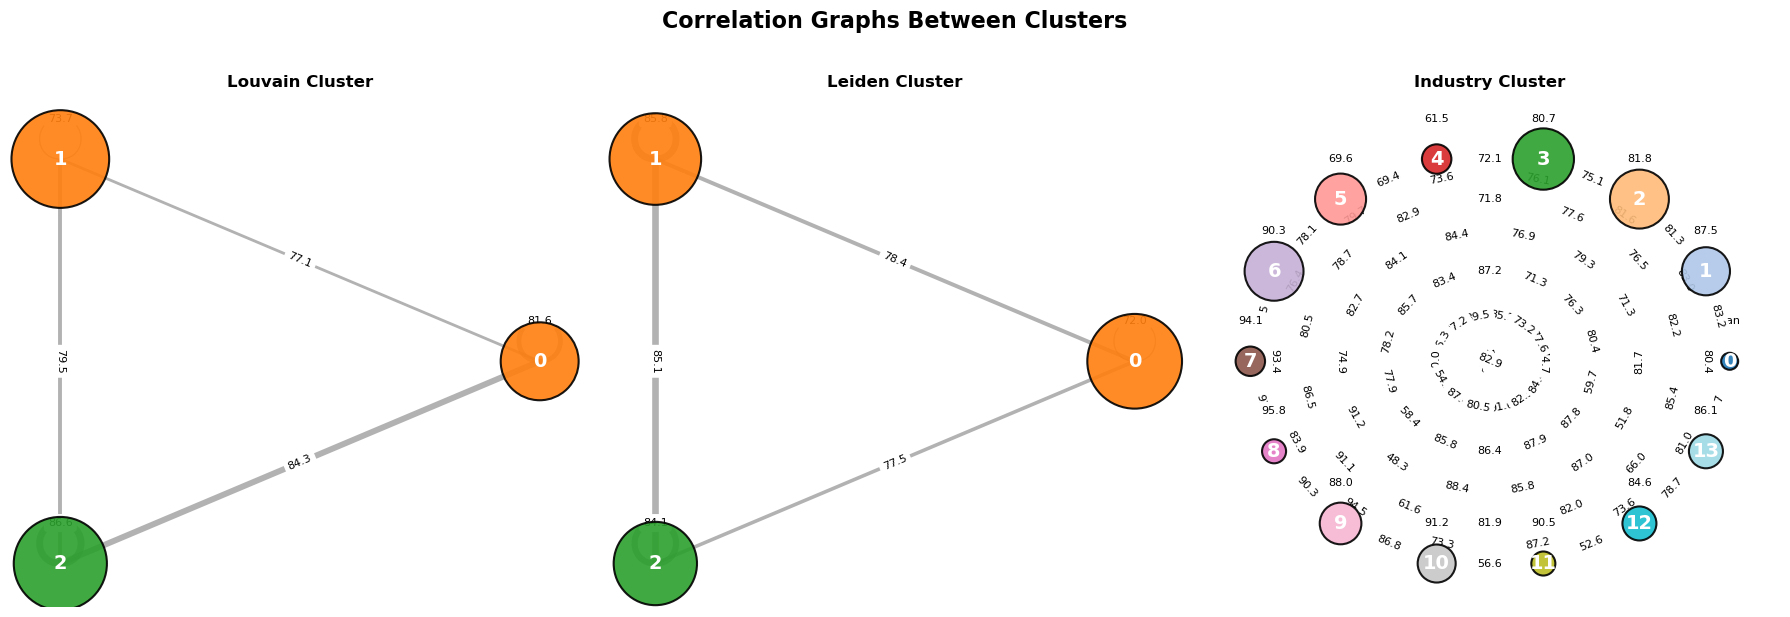


Correlation graphs complete!


In [4]:
from plots import plot_all_cluster_correlation_graphs

# Plot correlation graphs for all clustering methods
print("Creating cluster correlation graphs...")
fig_corr = plot_all_cluster_correlation_graphs(Returns, clustering_results)
plt.show()

print("\nCorrelation graphs complete!")

### Individual Cluster Correlation Graphs

Create detailed correlation graphs for each clustering method individually.

Louvain Cluster Correlation Analysis:


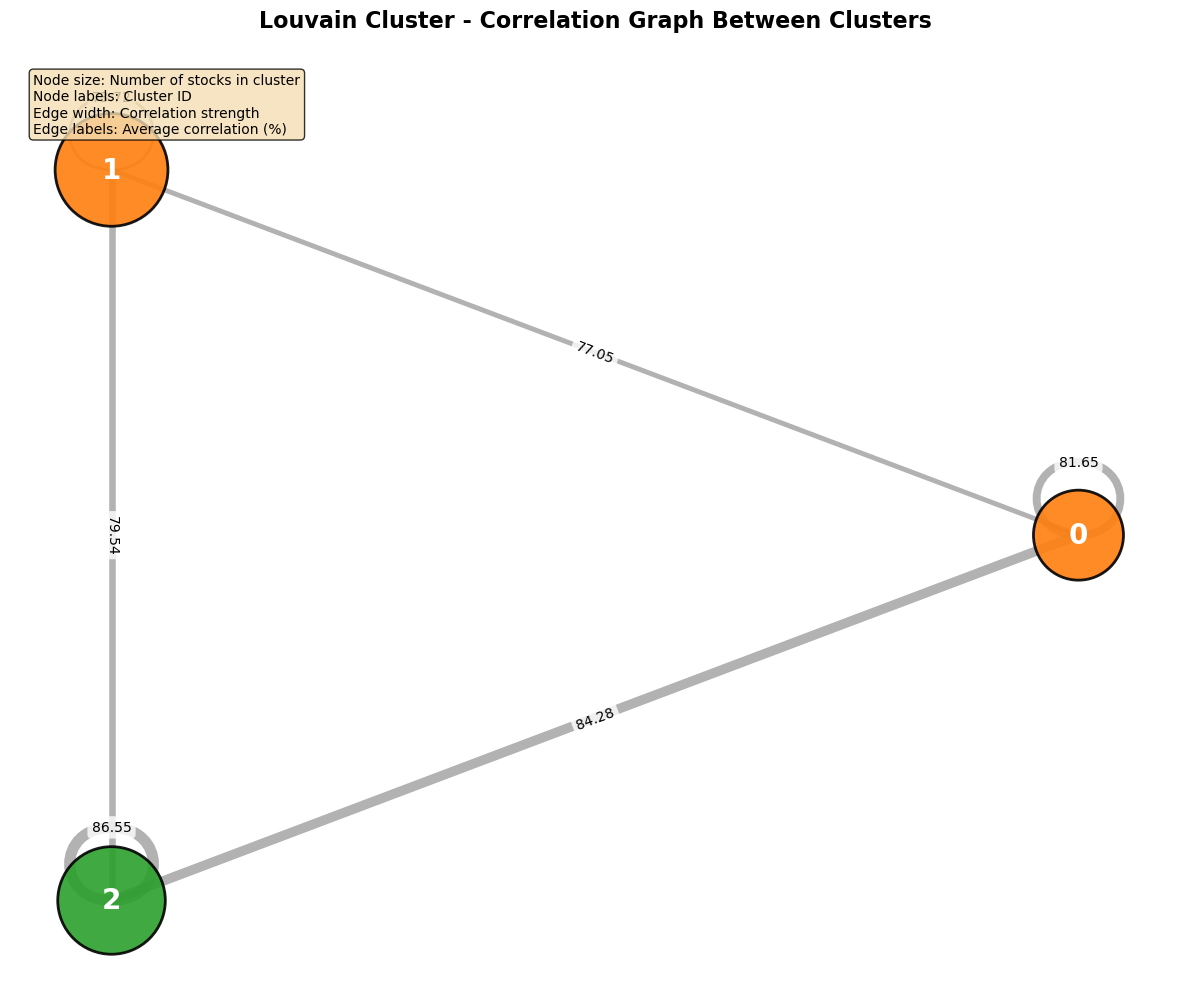

In [5]:
from plots import plot_cluster_correlation_graph

# Louvain Cluster Correlation Graph
print("Louvain Cluster Correlation Analysis:")
fig_louvain_corr, ax_louvain_corr = plot_cluster_correlation_graph(
    Returns, clustering_results, cluster_column='Louvain_Cluster'
)
plt.show()

Leiden Cluster Correlation Analysis:


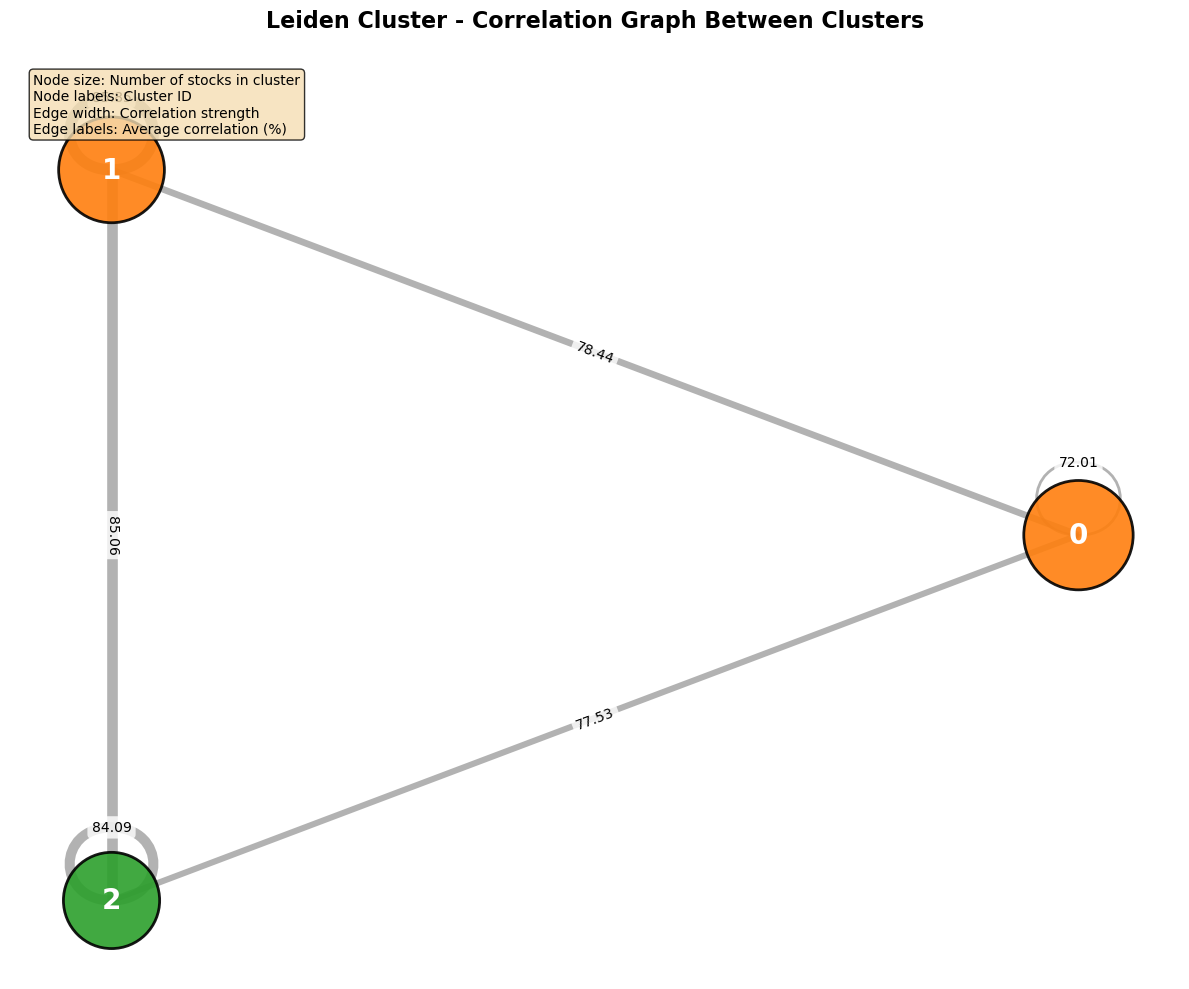

In [6]:
# Leiden Cluster Correlation Graph
print("Leiden Cluster Correlation Analysis:")
fig_leiden_corr, ax_leiden_corr = plot_cluster_correlation_graph(
    Returns, clustering_results, cluster_column='Leiden_Cluster'
)
plt.show()

Industry-Based Cluster Correlation Analysis:


/Users/timot/Desktop/Project Big DATA/plots.py:205: RuntimeWarning: Mean of empty slice
  avg_within = np.nanmean(np.abs(within_corr))


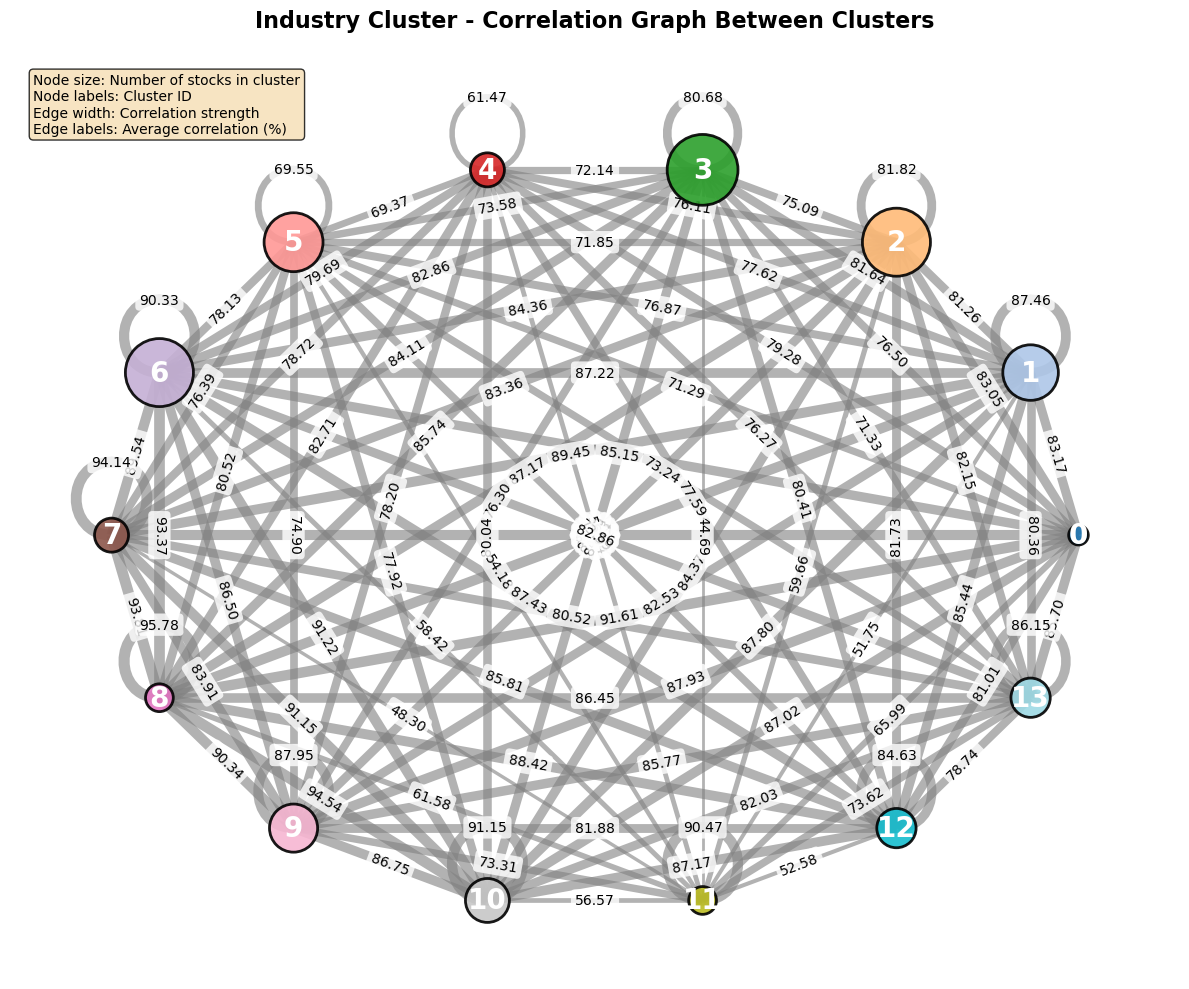

In [7]:
# Industry Cluster Correlation Graph
print("Industry-Based Cluster Correlation Analysis:")
fig_industry_corr, ax_industry_corr = plot_cluster_correlation_graph(
    Returns, clustering_results, cluster_column='Industry_Cluster'
)
plt.show()

## Step 5: Individual Industry Distribution Analysis 

Create detailed plots for each clustering method individually.

Leiden Clustering Analysis:


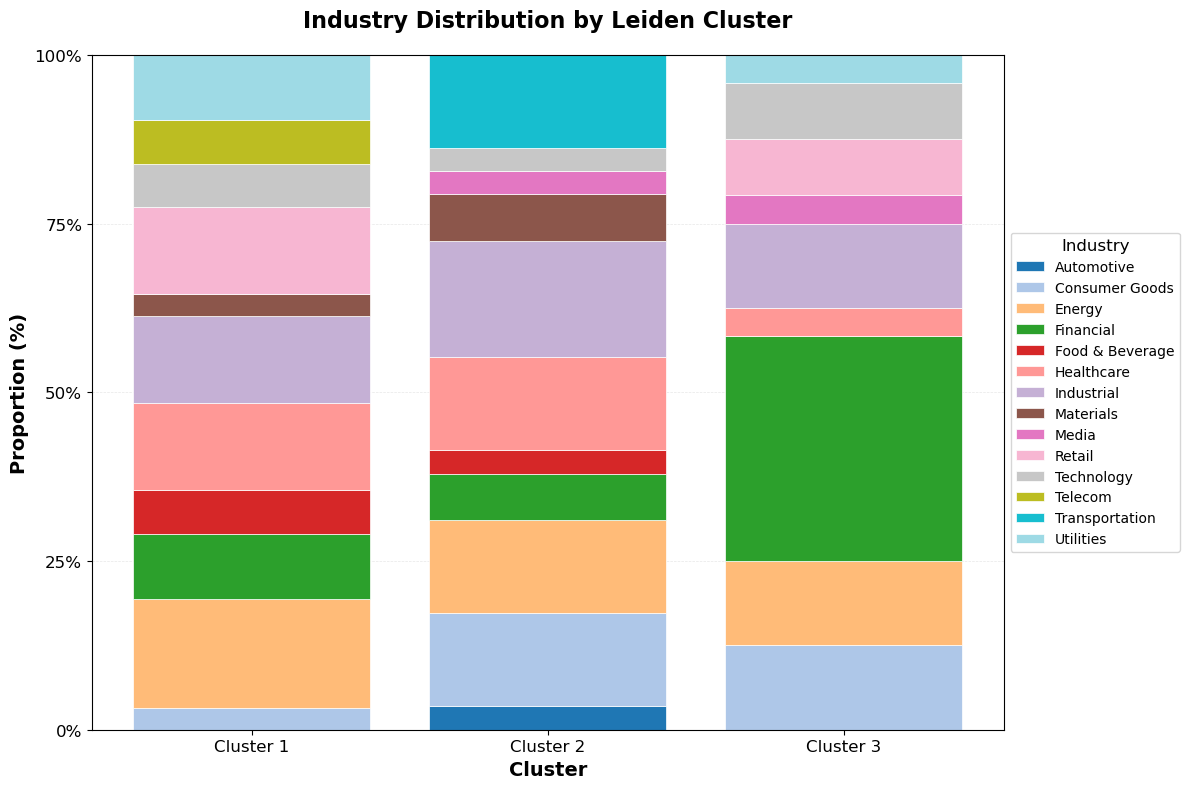

In [8]:
# Plot Leiden clustering
print("Leiden Clustering Analysis:")
fig_leiden, ax_leiden = plot_industry_distribution_by_cluster(clustering_results, cluster_column='Leiden_Cluster')
plt.show()

Louvain Clustering Analysis:


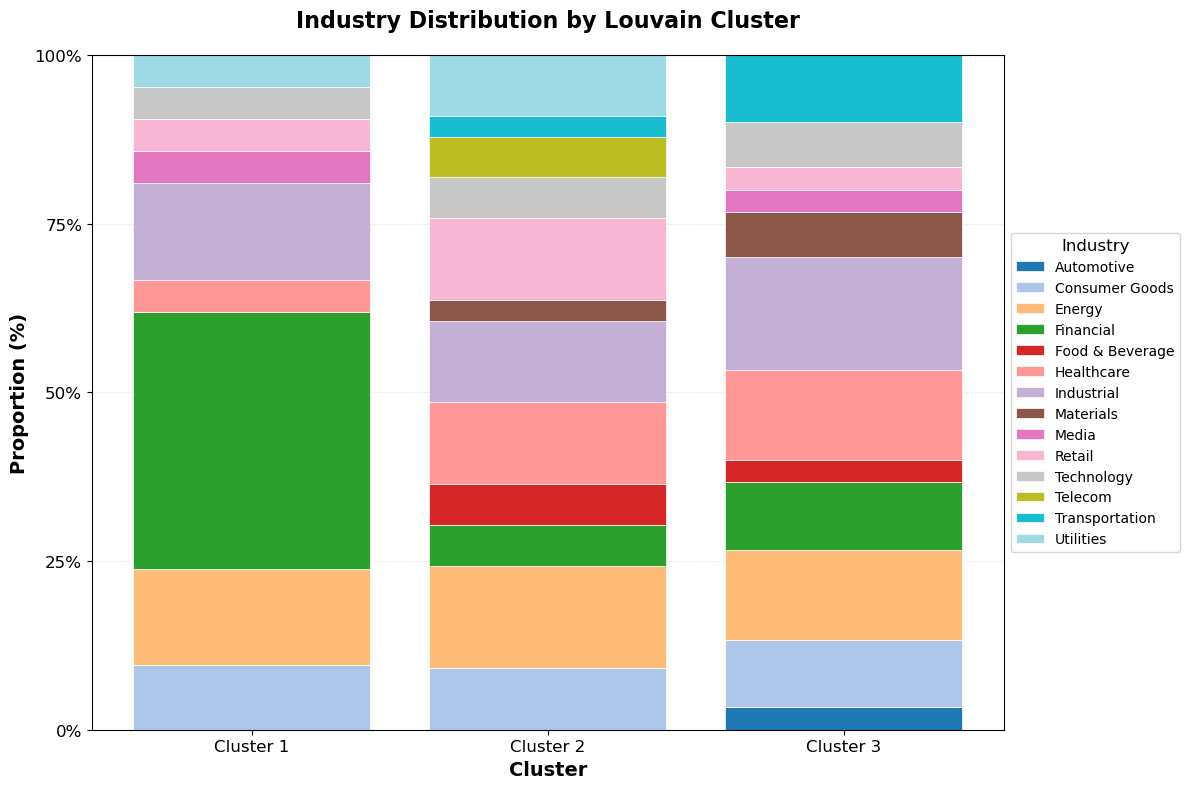

In [9]:
# Plot Louvain clustering
print("Louvain Clustering Analysis:")
fig_louvain, ax_louvain = plot_industry_distribution_by_cluster(clustering_results, cluster_column='Louvain_Cluster')
plt.show()

Industry-Based Clustering Analysis:


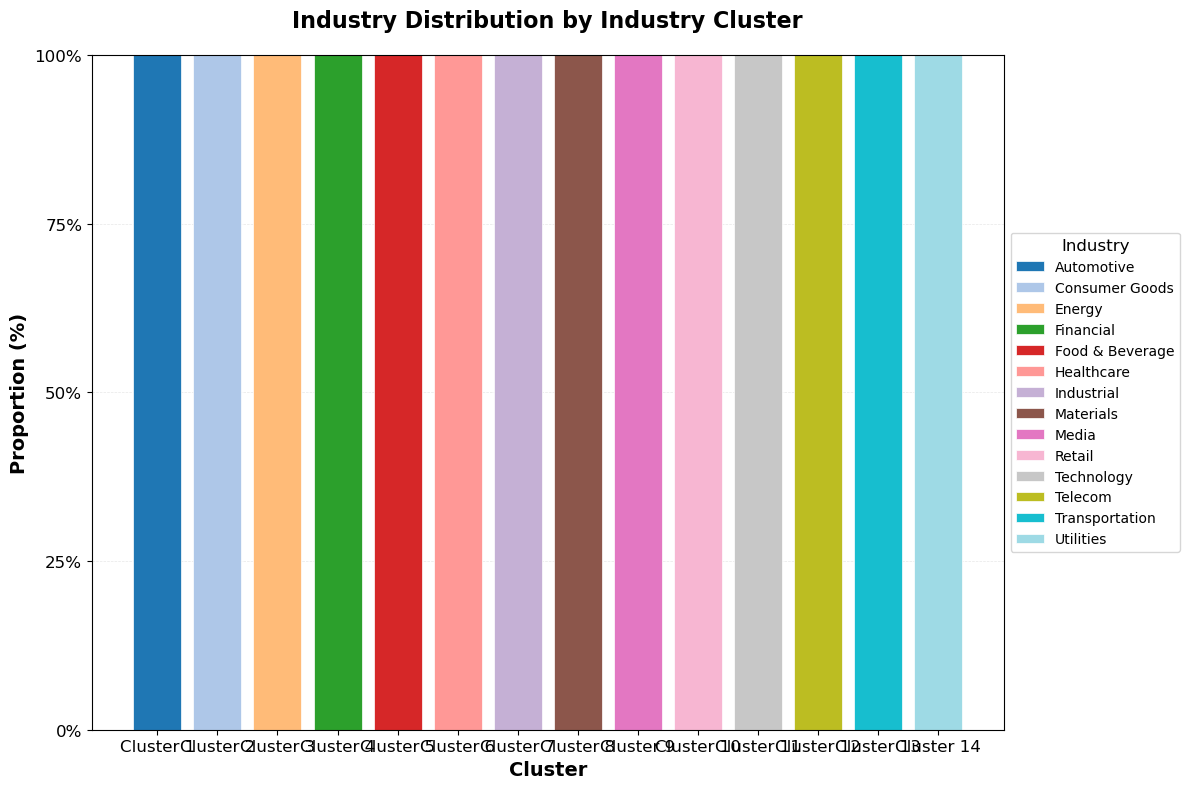

In [10]:
# Plot Industry clustering
print("Industry-Based Clustering Analysis:")
fig_industry, ax_industry = plot_industry_distribution_by_cluster(clustering_results, cluster_column='Industry_Cluster')
plt.show()

## Step 6: Export Results 

Save the clustering results to a CSV file for further analysis.

In [22]:
# Export clustering results
output_filename = 'clustering_results.csv'
clustering_results.to_csv(output_filename)
print(f"Clustering results saved to: {output_filename}")

# Display final results
print("\nFinal Clustering Results:")
clustering_results

Clustering results saved to: clustering_results.csv

Final Clustering Results:


,Louvain_Cluster,Leiden_Cluster,Industry_Cluster
ABT,0,2,5
AEP,1,0,13
ALL,2,1,7
APA,2,1,2
AVP,1,0,7
...,...,...,...
WMB,2,1,2
WMT,1,0,9
WY,2,1,7
XOM,1,0,2
